In [219]:
# from google.colab import drive
# drive.mount('/content/drive')

In [220]:
#Importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout, Bidirectional
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [221]:
!ls drive/MyDrive/BiLSTM-Prophet/

ls: cannot access 'drive/MyDrive/BiLSTM-Prophet/': No such file or directory


In [222]:
#Importing the dataset
# df = pd.read_csv('drive/MyDrive/BiLSTM-Prophet/output_file.csv',index_col=0)
df = pd.read_csv('output_file_average.csv',index_col=0)
columns_to_drop = ['Company', 'Author', 'Headline','Description','Article Body','URL','Date of Publishing','score']
df.drop(columns_to_drop, axis=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,average_score
Date,,,,,,,
2020-02-24,1343.840454,1350.469360,1316.227661,1321.165039,1302.374268,10685107,1.0
2020-02-25,1327.062500,1327.062500,1289.209106,1295.060913,1276.641479,13872531,-1.0
2020-02-26,1289.209106,1291.357788,1268.499512,1272.751099,1254.648926,14681374,-1.0
2020-02-27,1269.093750,1274.396973,1251.721436,1267.493774,1249.466431,12527496,-1.0
2020-02-28,1238.829346,1240.749512,1211.490845,1214.828125,1197.549805,19657884,-1.0
...,...,...,...,...,...,...,...
2024-03-01,2927.000000,3000.000000,2925.000000,2981.100098,2981.100098,5587933,0.7
2024-03-04,2980.949951,3024.899902,2974.449951,3014.800049,3014.800049,5012210,2.0
2024-03-05,3011.550049,3014.800049,2972.100098,3000.399902,3000.399902,3553834,-1.0


In [223]:
#Get the number of rows and columns in the data set
df.shape
df.iloc[df.values==-np.inf]
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

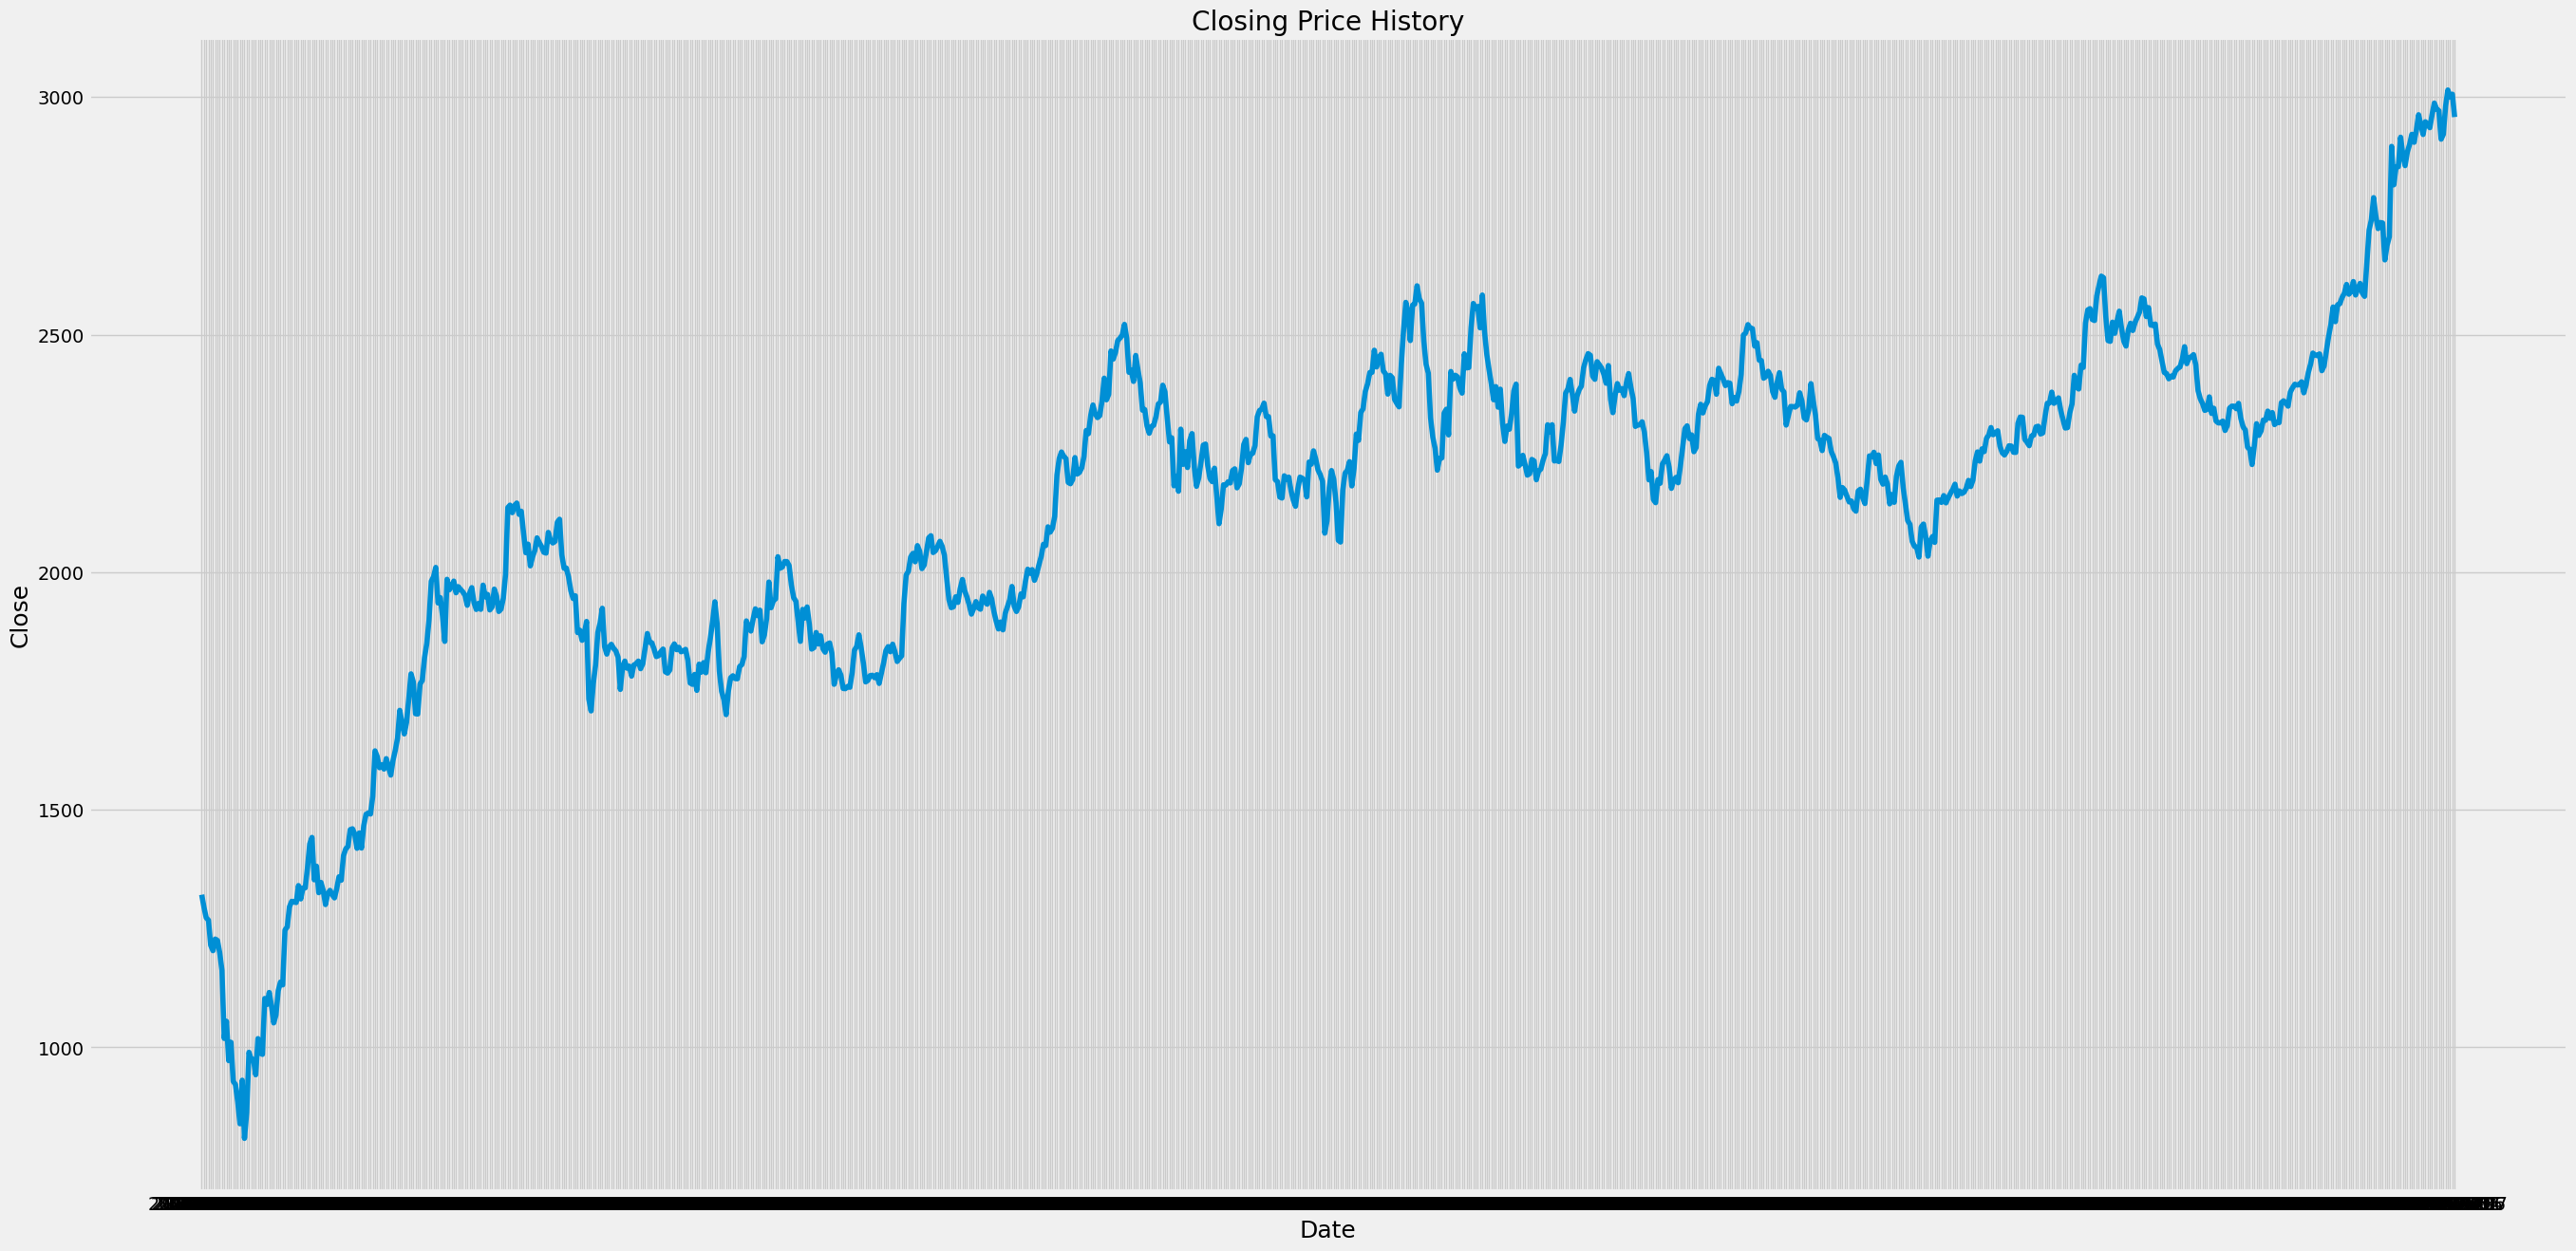

In [224]:
#Visualizing the closing price history
plt.figure(figsize=(30,15))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.show()

In [225]:
#!pip install TA-Lib

In [226]:
#Introducing relevant technical indicators
#import talib as tl

#real = tl.RSI(df.Close, timeperiod=14)
#df["RSI"] = real

#EMA = pd.Series(df['Close'].ewm(span = 20, min_periods = 20 - 1).mean(),
#name = 'EWMA_' + str(20))
#df["EWMA"] = EMA

#macd, macdsignal, macdhist = tl.MACD(df.Close, fastperiod=12, slowperiod=26, signalperiod=9)
#df["MACD"] = macd


In [227]:
#Removing the na values
df1 = df.dropna()
df1.head()

,Open,High,Low,Close,Adj Close,Volume,average_score
Date,,,,,,,
2020-02-24,1343.840454,1350.469360,1316.227661,1321.165039,1302.374268,10685107,1.0
2020-02-25,1327.062500,1327.062500,1289.209106,1295.060913,1276.641479,13872531,-1.0
2020-02-26,1289.209106,1291.357788,1268.499512,1272.751099,1254.648926,14681374,-1.0
2020-02-27,1269.093750,1274.396973,1251.721436,1267.493774,1249.466431,12527496,-1.0
2020-02-28,1238.829346,1240.749512,1211.490845,1214.828125,1197.549805,19657884,-1.0


In [228]:
  #Create a new dataframe with only Close column
  data = df1.filter(['Close'])
  #Convert the dataframe to a numpy array
  dataset = data.values
  #Get number of rows to train the model
  training_data_len = math.ceil(len(dataset)*.60)
  training_data_len

602

In [229]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
scaled_data.shape

(1002, 1)

In [230]:
#Create training data set
#Cretae the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into X_train and Y_train data sets
x_train = []
y_train = []

for i in range(9, len(train_data)):
  x_train.append(train_data[i-9:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 10:
    print(x_train)
    print(y_train)
    print()


[array([0.23242821, 0.22059757, 0.21048655, 0.20810388, 0.1842353 ,
       0.17905553, 0.19011955, 0.18881425, 0.17698361])]
[0.16034602254698593]

[array([0.23242821, 0.22059757, 0.21048655, 0.20810388, 0.1842353 ,
       0.17905553, 0.19011955, 0.18881425, 0.17698361]), array([0.22059757, 0.21048655, 0.20810388, 0.1842353 , 0.17905553,
       0.19011955, 0.18881425, 0.17698361, 0.16034602])]
[0.16034602254698593, 0.09534985102671423]



In [231]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [232]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(593, 9, 1)

In [233]:
#Building the LSTM model
DROPOUT = 0.2
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1))))
model.add(Dropout(rate=DROPOUT))
# model.add(Bidirectional(LSTM(50, return_sequences=True)))
# model.add(Dropout(rate=DROPOUT))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dropout(rate=DROPOUT))
model.add(Dense(25))
model.add(Dense(1))
model.add(Activation('linear'))

In [234]:
#Compile the model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error')

In [235]:
#Train the model
model.fit(x_train, y_train, batch_size=25, epochs=8)

Epoch 1/8
24/24 [==============================] - 16s 34ms/step - loss: 0.0632
Epoch 2/8
24/24 [==============================] - 1s 35ms/step - loss: 0.0036
Epoch 3/8
24/24 [==============================] - 1s 37ms/step - loss: 0.0021
Epoch 4/8
24/24 [==============================] - 1s 41ms/step - loss: 0.0019
Epoch 5/8
24/24 [==============================] - 1s 27ms/step - loss: 0.0016
Epoch 6/8
24/24 [==============================] - 0s 20ms/step - loss: 0.0017
Epoch 7/8
24/24 [==============================] - 0s 20ms/step - loss: 0.0016
Epoch 8/8
24/24 [==============================] - 1s 21ms/step - loss: 0.0014


In [236]:
#Create the testing data set
#Create a new array containing scaled values from index
test_data = scaled_data[training_data_len - 9: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(9, len(test_data)):
  x_test.append(test_data[i-9:i, 0])

In [237]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [238]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [239]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 3s 14ms/step


In [240]:
#Get R^2 Score
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9181090135972033

In [241]:
#Get Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

45.579401852382816

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(30,15))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
predictions
plt.show()

<ipython-input-242-8c2693b41c80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
